start


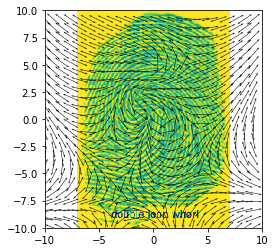

In [77]:
import cmath
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
# from scipy.misc import imread
import imageio
import matplotlib.cbook as cbook

print ("start")

#Get image of fingerprint for background
# datafile = cbook.get_sample_data('./Users/mastercljohnson/Desktop/Levchenko_Project_Readings/Pictures_of_fingerprints/fingerprint3')
img = imageio.imread('C://Users/mastercljohnson/Desktop/Levchenko_Project_Readings/Pictures_of_fingerprints/Original_fingerprint.jpg')

#create iterable for function mapping
#formapx=np.arange(-10,10,0.2)
# formapy= [0]*len(formapx)
#formapy=np.arange(-10,10,0.2)

looptemp = np.arange(-10.0,10.0, 0.8)

#print(looptemp)

formapx = []
formapy = []

for u in looptemp:
    for o in looptemp:
        formapx.append(u)
        formapy.append(o)
    
#print(formapx)
#print ("finish initialize")
#print ("this is formapx",formapx)
#print ("this is formapy",formapy)

formap = []
xval = []
yval = []
xxval = []
yyval = []
 


#this is a matrix used for testing, 
#it mimics the minutae points represented at the 0th index
# and the type of points at the first index
#complex numbers will be implemented
# and there will also likely be an import for the dataset model
#minutiaArray= [[(1+2j)/2,1],[(2-1j)/2,0],[(1+2j)/3,1],[(5+3j)/4,1],[(2+1j)/2,0],[4+2j,1],[(3-5j)/4,0],[(2-3j)/2,0],[(2-4j)/3,1]]
#minutiaArray= [[(1+2j)/5,1]]
#minutiaArray= [[(1+2j)/5,0]]
minutiaArray= [
              [-1.8+2.5j,1],
                [-1,1],
#                [(-3+2j),1],
               [(4-1.25j),0],
               [(1),1],
#                [(-2-5j),0],
                [0+5j, 1],
               [(4.5-5j),0], 
                [(-4-2j),0],
#                [(-2+2j),1],
#                [(-4-5j),0],
#                [(-4-6j),0],
               [(-3-7j),0],
                [(-4-8j),0],
                [(3+5.5j),0],
                [(-3-6j),0],
                [(1-7.5j),0]
                    ]



#function for modelling the direction field 
def complexfunction(x,minutiaArray):
    val=1
    j = 1j
    for i in range(0,len(minutiaArray)):
        #for cores
        if(minutiaArray[i][1]==1):
            val=val*(x-minutiaArray[i][0])
        # for deltas
        if(minutiaArray[i][1]==0):
            val=val/(x-minutiaArray[i][0])
    val = cmath.sqrt((1)*val)
    return val
    
#print (complexfunction(2,minutiaArray))
#print ("into loop1")

i = 0
while i < len(formapx):
    formap.append(complex(formapx[i],formapy[i]))
#     print(complex(formapx[i],formapy[i]))
    i+=1

#print ("into loop2")    
for z in formap:
    xval.append(1*complexfunction(z,minutiaArray).real/(np.abs(complexfunction(z,minutiaArray))))
    yval.append(1*complexfunction(z,minutiaArray).imag/(np.abs(complexfunction(z,minutiaArray))))
    xxval.append((-1)*complexfunction(z,minutiaArray).real/(np.abs(complexfunction(z,minutiaArray))))
    yyval.append((-1)*complexfunction(z,minutiaArray).imag/(np.abs(complexfunction(z,minutiaArray))))






#plotting the fingerprint
fig, ax = plt.subplots()
ax.axis([-10,10,-10,10])
patch = []

#these width and height parameters will be updated once the script for
#including all of the minutiae has been implemented
xcenter, ycenter = 0,0
width, height = 2,2
angle= 0




fig = plt.figure()
# e1 = patches.Arc((xcenter, ycenter+height/2), width, height,
#                      angle,theta1=0.0,theta2=90.0)
# e2 = patches.Arc((xcenter, ycenter+height/2), width, height,
#                      angle,theta1=90,theta2=180)
# e3 = patches.Arc((xcenter, ycenter-height/2), width, height,
#                      angle,theta1=180,theta2=270)
# e4 = patches.Arc((xcenter, ycenter-height/2), width, height,
#                      theta1=270,theta2=0)
# r1= patches.Rectangle((xcenter-width/2, ycenter-height/2), width, height,
#                      angle,fill=False)
# #p = PatchCollection(patch)
# #ax.add_collection(p)
# ax.add_patch(e1)
# ax.add_patch(e4)
# ax.add_patch(e3)
# ax.add_patch(e2)
# ax.add_patch(r1)

# Show image of fingerprint
ax.imshow(img, zorder=0, extent=[-7, 7, -10, 10])

#quiverplot will eventually be used with the arrays from the function
# Find way to replace quiver plot with continuous lines (actually plot function)

ax.quiver(formapx,formapy,xval,yval,scale = 25)
ax.quiver(formapx,formapy,xxval,yyval,scale = 25)


# ax.quiver(xval,yval)
ax.set_aspect('equal','box')
plt.show()

In [ ]:
# estimate of the derivative of the orientation given by gradient of the modeled LRO function

def delta(z):
    x= 0
    for i in range (1,k):
        #what are x_ci, x_di, y_ci, y_di
        x = x+1/2(y_ci-y, x-x_ci)/((x-x_ci)^2+(y-y_ci)^2)-(y_di-y,x-x_di)/((x-x_di)^2+(y-y_di)^2)

In [ ]:
# from procedure in the paper
# orientation unwrapping where x is the data to be unwrapped
# xdot is the array of derivative values
def procedure_unwrap(x, xdot):
    maxdiff = pi/4
    x[0]= x[0]%pi
    for i in range(1, len(x)-1):
        diff = x[i]-x[i-1]
        if (diff>maxdiff && xdot[i]< 0):
            x[i]=x[i]-pi
        else if( diff < -maxdiff && xdot[i]>0 ):
            x[i]= x[i]+pi

In [ ]:
#interpolation algorithm from paper
#row, and column will be dummy values for unwrapping dataset
#n*n
for i in range(1, n):
    procedure_unwrap(row[i])
    #interpolate values, row i by factor K?
for q in range (1, n*K)
    procedure_unwrap(col[q])
    #interpolate values, col i by factor K?
    #wrap col i
    
# achieves n*n rows